In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
%matplotlib inline

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

import util

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.1.0


In [3]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

Train/Test Split

In [4]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2)

In [5]:
train.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
218,68.0,1,1021,1,35,0,271000.0,1.1,134,1,0,197,0
233,53.0,1,707,0,38,0,330000.0,1.4,137,1,1,209,0
267,56.0,1,135,1,38,0,133000.0,1.7,140,1,0,244,0
21,65.0,1,128,1,30,1,297000.0,1.6,136,0,0,20,1


# Create Model 

In [6]:
import models

# set initial bias
neg, pos = np.bincount(df['DEATH_EVENT'])# set count negative and positive samples
initial_bias = np.log([pos/neg])


mobj = models.modelObj()
model = mobj.create_model(len(train.keys())-1, bias = initial_bias)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                208       
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 225
Trainable params: 225
Non-trainable params: 0
_________________________________________________________________


# Normalize Data

In [7]:
train_y = train.pop('DEATH_EVENT')
train_x = util.norm(train)
train_x.head()

test_y = test.pop('DEATH_EVENT')
test_x = util.norm(test)

# Train Model

In [8]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_auc', 
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)

In [9]:
train_x.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.090909,0.0,0.259888,1.0,0.696970,0.0,0.869075,0.033708,0.757576,0.0,0.0,0.975089
1,0.509091,1.0,0.127328,1.0,0.318182,0.0,0.298097,0.067416,0.636364,1.0,0.0,0.686833
2,0.236364,1.0,0.087267,0.0,0.363636,0.0,0.369621,0.101124,0.727273,1.0,1.0,0.729537
3,0.290909,1.0,0.014289,1.0,0.363636,0.0,0.130804,0.134831,0.818182,1.0,0.0,0.854093
4,0.454545,1.0,0.013396,1.0,0.242424,1.0,0.329616,0.123596,0.696970,0.0,0.0,0.056940


In [12]:
print(np.unique(train_y))

non_resampled_history = model.fit(
    train_x,
    train_y,
    batch_size=mobj.BATCH_SIZE,
    epochs=mobj.EPOCHS,
    callbacks = [early_stopping, models.printDot()],
    validation_split=0.2
    )

[0 1]
Train on 191 samples, validate on 48 samples
Epoch 1/100
191/191 [==============================] - 3s 14ms/sample - loss: 0.6704 - tp: 10.0000 - fp: 32.0000 - tn: 106.0000 - fn: 43.0000 - accuracy: 0.6073 - precision: 0.2381 - recall: 0.1887 - auc: 0.4964 - val_loss: 0.6542 - val_tp: 0.0000e+00 - val_fp: 3.0000 - val_tn: 29.0000 - val_fn: 16.0000 - val_accuracy: 0.6042 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5215
Epoch 2/100
191/191 [==============================] - 0s 298us/sample - loss: 0.6573 - tp: 11.0000 - fp: 24.0000 - tn: 114.0000 - fn: 42.0000 - accuracy: 0.6545 - precision: 0.3143 - recall: 0.2075 - auc: 0.4730 - val_loss: 0.6485 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 32.0000 - val_fn: 16.0000 - val_accuracy: 0.6667 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5352
Epoch 3/100
191/191 [==============================] - 0s 287us/sample - loss: 0.6610 - tp: 8.0000 - fp: 22.0000 - tn: 116.0000 - fn: 45.0000 - ac

191/191 [==============================] - 0s 282us/sample - loss: 0.5954 - tp: 1.0000 - fp: 2.0000 - tn: 136.0000 - fn: 52.0000 - accuracy: 0.7173 - precision: 0.3333 - recall: 0.0189 - auc: 0.5622 - val_loss: 0.6211 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 32.0000 - val_fn: 16.0000 - val_accuracy: 0.6667 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.6143
Epoch 21/100
191/191 [==============================] - 0s 313us/sample - loss: 0.5865 - tp: 0.0000e+00 - fp: 1.0000 - tn: 137.0000 - fn: 53.0000 - accuracy: 0.7173 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.5990 - val_loss: 0.6206 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 32.0000 - val_fn: 16.0000 - val_accuracy: 0.6667 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.6211
Epoch 22/100
191/191 [==============================] - 0s 266us/sample - loss: 0.5814 - tp: 0.0000e+00 - fp: 4.0000 - tn: 134.0000 - fn: 53.0000 - accuracy: 0.7016 - precision: 0.0000e+00 - reca

191/191 [==============================] - 0s 282us/sample - loss: 0.5756 - tp: 2.0000 - fp: 2.0000 - tn: 136.0000 - fn: 51.0000 - accuracy: 0.7225 - precision: 0.5000 - recall: 0.0377 - auc: 0.6265 - val_loss: 0.6049 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 32.0000 - val_fn: 16.0000 - val_accuracy: 0.6667 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.6729
Epoch 40/100
191/191 [==============================] - 0s 282us/sample - loss: 0.5499 - tp: 3.0000 - fp: 0.0000e+00 - tn: 138.0000 - fn: 50.0000 - accuracy: 0.7382 - precision: 1.0000 - recall: 0.0566 - auc: 0.6872 - val_loss: 0.6034 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 32.0000 - val_fn: 16.0000 - val_accuracy: 0.6667 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.6816
Epoch 41/100
191/191 [==============================] - 0s 272us/sample - loss: 0.5651 - tp: 3.0000 - fp: 1.0000 - tn: 137.0000 - fn: 50.0000 - accuracy: 0.7330 - precision: 0.7500 - recall: 0.0566 - auc

191/191 [==============================] - 0s 266us/sample - loss: 0.5500 - tp: 4.0000 - fp: 3.0000 - tn: 135.0000 - fn: 49.0000 - accuracy: 0.7277 - precision: 0.5714 - recall: 0.0755 - auc: 0.6760 - val_loss: 0.5885 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 32.0000 - val_fn: 16.0000 - val_accuracy: 0.6667 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.7119
Epoch 59/100
191/191 [==============================] - 0s 272us/sample - loss: 0.5015 - tp: 6.0000 - fp: 0.0000e+00 - tn: 138.0000 - fn: 47.0000 - accuracy: 0.7539 - precision: 1.0000 - recall: 0.1132 - auc: 0.7912 - val_loss: 0.5879 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 32.0000 - val_fn: 16.0000 - val_accuracy: 0.6667 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.7119
Epoch 60/100
191/191 [==============================] - 0s 266us/sample - loss: 0.5415 - tp: 4.0000 - fp: 3.0000 - tn: 135.0000 - fn: 49.0000 - accuracy: 0.7277 - precision: 0.5714 - recall: 0.0755 - auc

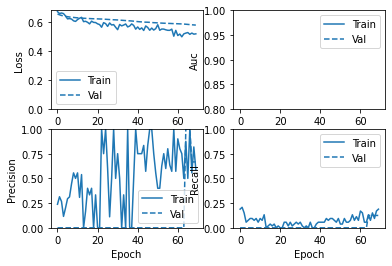

In [13]:
util.plot_metrics(non_resampled_history)

# Evaluate the Model

In [14]:
#test_y = test.pop('DEATH_EVENT')
#test_x = test
test_predictions_no_r = model.predict(test_x, batch_size=mobj.BATCH_SIZE)

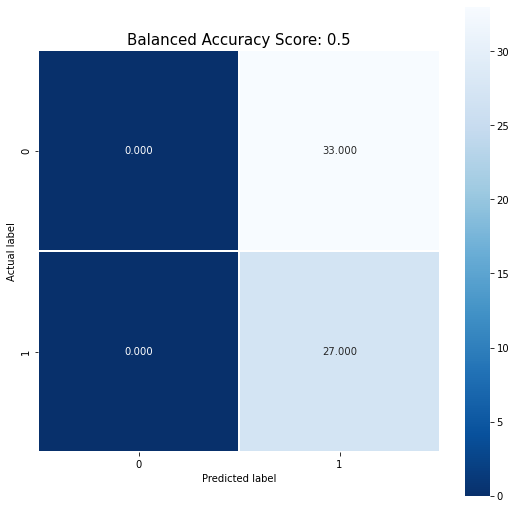

In [18]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix

#print(test_y.shape)
#print(test_predictions_no_r.shape)
#print(test_predictions_no_r)

bscore_no_res = balanced_accuracy_score(test_y, keras.utils.to_categorical(test_predictions_no_r))

cm = confusion_matrix(test_y, keras.utils.to_categorical(test_predictions_no_r))
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Balanced Accuracy Score: {0}'.format(bscore_no_res)
plt.title(all_sample_title, size = 15);

In [ ]:
no_res_results = model.evaluate(test_x, test_y,
                                  batch_size=mobj.BATCH_SIZE, verbose=0)
for name, value in zip(model.metrics_names, no_res_results):
  print(name, ': ', value)
print()

# UnderSampling (NearMiss1)

In [ ]:
df.head()

In [ ]:
df.describe()

# Apply Resampling to Dataset

In [ ]:
from imblearn.under_sampling import NearMiss

raw_df = df.copy(deep=True)

y = raw_df.pop('DEATH_EVENT')
X = raw_df

nm1 = NearMiss(version=1)

X_resampled, y_resampled = nm1.fit_sample(X, y)

nm1_df = pd.DataFrame(X_resampled, columns=X.columns)
nm1_df['DEATH_EVENT'] = y_resampled
nm1_df.head()

In [ ]:
nm1_df.describe()

# Train/Test Split

In [ ]:
train, test = train_test_split(nm1_df, test_size=0.2)

# Create New Model 

In [ ]:
# Create Model 

import models

# set initial bias
neg, pos = np.bincount(nm1_df['DEATH_EVENT'])# set count negative and positive samples
initial_bias = np.log([pos/neg])

mobj = models.modelObj()
model = mobj.create_model(len(train.keys())-1, bias = initial_bias)

model.summary()

# Normalize Data

In [ ]:
# Normalize Data

train_y = train.pop('DEATH_EVENT')
train_x = util.norm(train)
train_x.head()

test_y = test.pop('DEATH_EVENT')
test_x = util.norm(test)
train_x.head()

In [ ]:
nm1_resampled_history = model.fit(
    train_x,
    train_y,
    batch_size=mobj.BATCH_SIZE,
    epochs=mobj.EPOCHS,
    callbacks = [early_stopping, models.printDot()],
    validation_split=0.2)

In [ ]:
util.plot_metrics(nm1_resampled_history)

# Evaluate Model

In [ ]:
#test_y = test.pop('DEATH_EVENT')
#test_x = test
test_predictions_nm1 = model.predict(test_x, batch_size=mobj.BATCH_SIZE)


bscore_no_res = balanced_accuracy_score(test_y, test_predictions_nm1)

cm = confusion_matrix(test_y, test_predictions_nm1)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Balanced Accuracy Score: {0}'.format(bscore_no_res)
plt.title(all_sample_title, size = 15);

nm1_results = model.evaluate(test_x, test_y,
                                  batch_size=mobj.BATCH_SIZE, verbose=0)
for name, value in zip(model.metrics_names, no_res_results):
  print(name, ': ', value)
print()

# OneSidedSelection

In [ ]:
raw_df = df.copy(deep=True)
raw_df.head()

Using batch generator from imbalanced learn

In [ ]:
train, test = train_test_split(nm1_df, test_size=0.2)

In [ ]:
# set initial bias
neg, pos = np.bincount(raw_df['DEATH_EVENT'])# set count negative and positive samples
initial_bias = np.log([pos/neg])

# Normalize Data

In [ ]:
# Create Model
#y = train.pop('DEATH_EVENT')
#y_train = keras.utils.to_categorical(y, 3)
y_train =train.pop('DEATH_EVENT')
X_train = train
y_test =test.pop('DEATH_EVENT')
X_test = test
mobj = models.modelObj()
model = mobj.create_model(len(X.keys())-1, bias = initial_bias)

In [ ]:
X_train = util.norm(X_train)
X_test = util.norm(X_test)
train_x.head()

In [ ]:
from imblearn.keras import balanced_batch_generator
from imblearn.under_sampling import OneSidedSelection

# fit the model using generator
training_generator, steps_per_epoch = balanced_batch_generator(
    X_train, y_train, sampler=OneSidedSelection(random_state=0), batch_size=mobj.BATCH_SIZE, random_state=42)

callback_history_oss = model.fit_generator(generator=training_generator,
                                        steps_per_epoch=steps_per_epoch,
                                        epochs=mobj.EPOCHS, verbose=0)